**BREAST CANCER PREDICTION**

This project aims to predict whether the cancer is benign or malignant


/kaggle/input/breast-cancer-wisconsin-data/data.csv

In [114]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models and related utilities
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib.pylab import rcParams
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Remove warnings
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv("data.csv", sep=',', encoding='utf-8')

**Exploraty Data Analysis**

*Dataset*

In [108]:
data.head() #primeiras 5 linhas

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Observations**:

1) 0 id - The feature ID cannot be used for classification

2) 32 Unnamed: 32 - Feature includes NaN so we do not need it

3) 1 diagnosis - It is binary categorical variable, so we can change to a Boolean model, leaving it in integer format



In [82]:
data1 = data.drop(columns=['id', 'Unnamed: 32'])

In [110]:
data1['diagnosis'] = data['diagnosis'].map({'B':0, 'M':1})

In [111]:
data1.isnull().sum().sum()

0

In [112]:
data1.duplicated().sum()

0

In [113]:
data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [86]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [87]:
y = data1.diagnosis

In [88]:
x = data1.drop(columns=['diagnosis'])


**Train and Test**

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(f'Train dataset = {x_train.shape} Train target = {y_train.shape}.')
print(f'Test dataset = {x_test.shape} Test target = {y_test.shape}.')

Train dataset = (398, 30) Train target = (398,).
Test dataset = (171, 30) Test target = (171,).


In [91]:
# To facilitate the code, let’s join x_train and y_train in the same dataframe:
data_train = pd.concat([x_train,y_train], axis = 1)

## Boxplot

For an overview of data, we will plot real data (not normalized/standardized)
in boxplots.
Therefore, in order to create a boxplots of similar scales, we will analyze the maximum, minimum, median and mean of each variable.


In [ ]:
variables= list(range(0, 30))
max=x.max()
min=x.min()
median=x.median()
mean=x.mean()

In [ ]:
df = pd.DataFrame({'Variable': variables,'Max':max, 'Min':min, 'Median': median, 'Mean':mean })
df.sort_values(by=['Max'])

,Variable,Max,Min,Median,Mean
fractal_dimension_se,19,0.02984,0.000895,0.003187,0.003795
smoothness_se,14,0.03113,0.001713,0.006380,0.007041
concave points_se,17,0.05279,0.000000,0.010930,0.011796
symmetry_se,18,0.07895,0.007882,0.018730,0.020542
fractal_dimension_mean,9,0.09744,0.049960,0.061540,0.062798
compactness_se,15,0.13540,0.002252,0.020450,0.025478
smoothness_mean,4,0.16340,0.052630,0.095870,0.096360
concave points_mean,7,0.20120,0.000000,0.033500,0.048919
fractal_dimension_worst,29,0.20750,0.055040,0.080040,0.083946
smoothness_worst,24,0.22260,0.071170,0.131300,0.132369


According to the table above, the variables were divided into 7 groups for a better visualization of boxplot

In [ ]:
datac1=pd.concat([y,x.iloc[:,[19,14,17,18]]],axis=1)

In [ ]:
datamelt1 = pd.melt(datac1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'fractal_dimension_se'),
  Text(1, 0, 'smoothness_se'),
  Text(2, 0, 'concave points_se'),
  Text(3, 0, 'symmetry_se')])

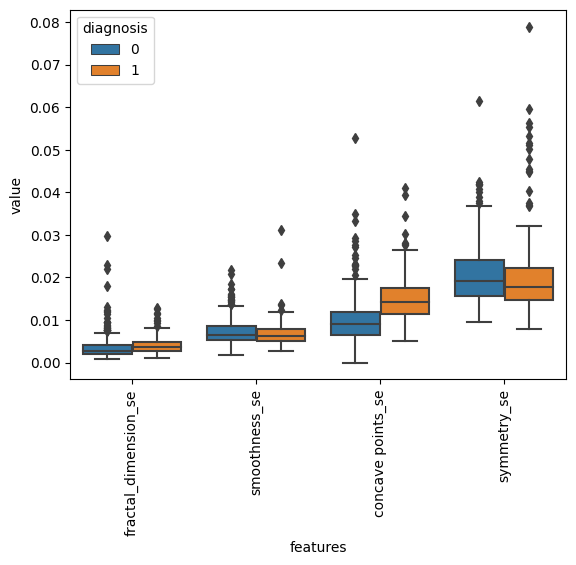

In [ ]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=datamelt1)
plt.xticks(rotation=90)

In [ ]:
datac2=pd.concat([y,x.iloc[:,[9, 15,4,7,29,24,27,8]]],axis=1)

In [ ]:
datamelt2= pd.melt(datac2,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'fractal_dimension_mean'),
  Text(1, 0, 'compactness_se'),
  Text(2, 0, 'smoothness_mean'),
  Text(3, 0, 'concave points_mean'),
  Text(4, 0, 'fractal_dimension_worst'),
  Text(5, 0, 'smoothness_worst'),
  Text(6, 0, 'concave points_worst'),
  Text(7, 0, 'symmetry_mean')])

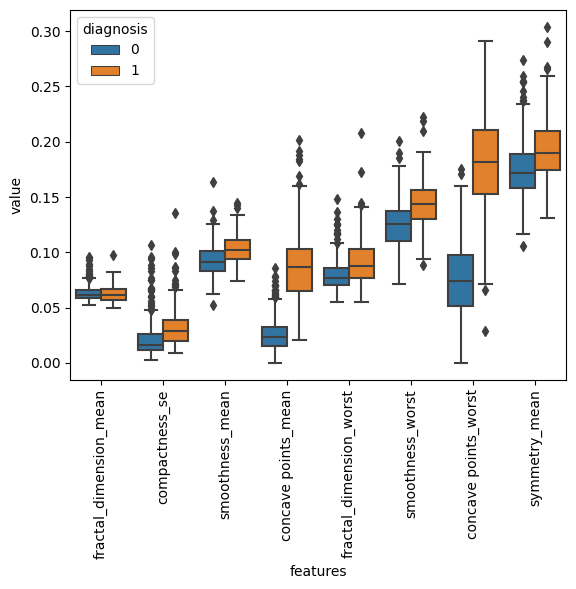

In [ ]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=datamelt2)
plt.xticks(rotation=90)

In [ ]:
datac3=pd.concat([y,x.iloc[:,[5,16,6,28]]],axis=1)

In [ ]:
datamelt3= pd.melt(datac3,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'compactness_mean'),
  Text(1, 0, 'concavity_se'),
  Text(2, 0, 'concavity_mean'),
  Text(3, 0, 'symmetry_worst')])

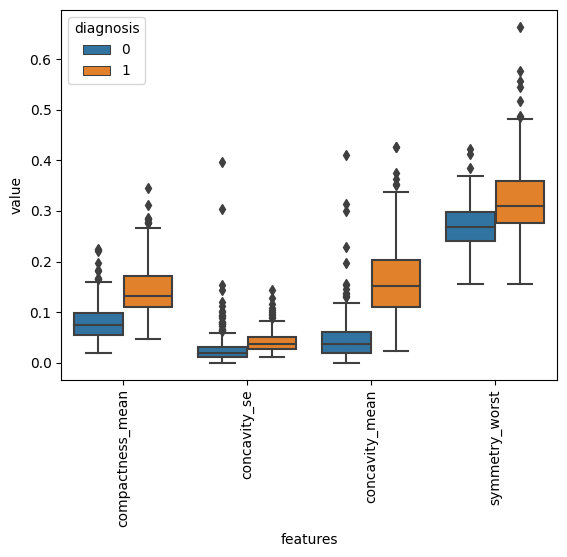

In [ ]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=datamelt3)
plt.xticks(rotation=90)

In [ ]:
datac4=pd.concat([y,x.iloc[:,[25, 26, 10, 11]]],axis=1)

In [ ]:
datamelt4 = pd.melt(datac4,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'compactness_worst'),
  Text(1, 0, 'concavity_worst'),
  Text(2, 0, 'radius_se'),
  Text(3, 0, 'texture_se')])

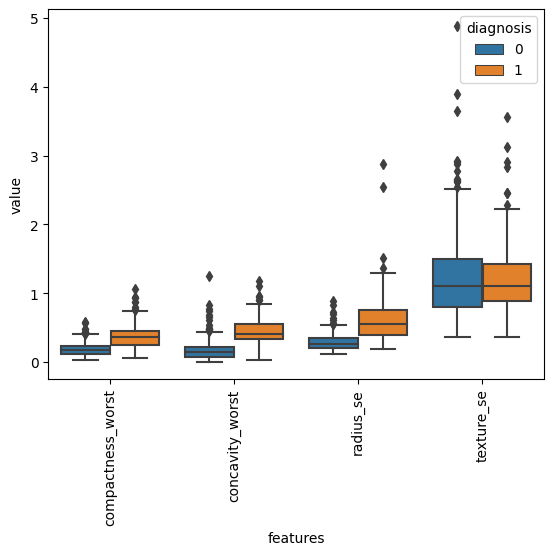

In [ ]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=datamelt4)
plt.xticks(rotation=90)

In [ ]:
datac5=pd.concat([y,x.iloc[:,[12, 0, 20, 1, 21,]]],axis=1)

In [ ]:
datamelt5 = pd.melt(datac5,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'perimeter_se'),
  Text(1, 0, 'radius_mean'),
  Text(2, 0, 'radius_worst'),
  Text(3, 0, 'texture_mean'),
  Text(4, 0, 'texture_worst')])

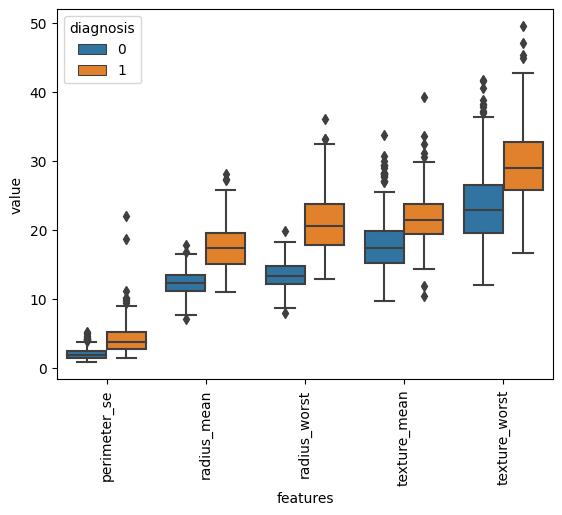

In [ ]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=datamelt5)
plt.xticks(rotation=90)

In [ ]:
datac6=pd.concat([y,x.iloc[:,[2, 22, 13]]],axis=1)

In [ ]:
datamelt6 = pd.melt(datac6,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2]),
 [Text(0, 0, 'perimeter_mean'),
  Text(1, 0, 'perimeter_worst'),
  Text(2, 0, 'area_se')])

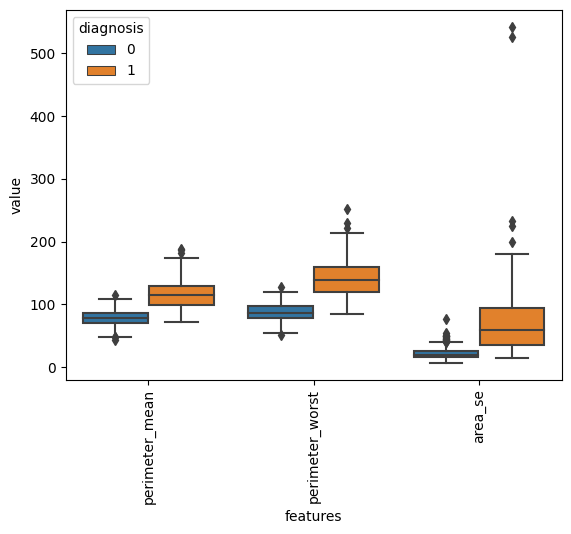

In [ ]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=datamelt6)
plt.xticks(rotation=90)

In [ ]:
datac7=pd.concat([y,x.iloc[:,[3,23]]],axis=1)

In [ ]:
datamelt7 = pd.melt(datac7,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1]), [Text(0, 0, 'area_mean'), Text(1, 0, 'area_worst')])

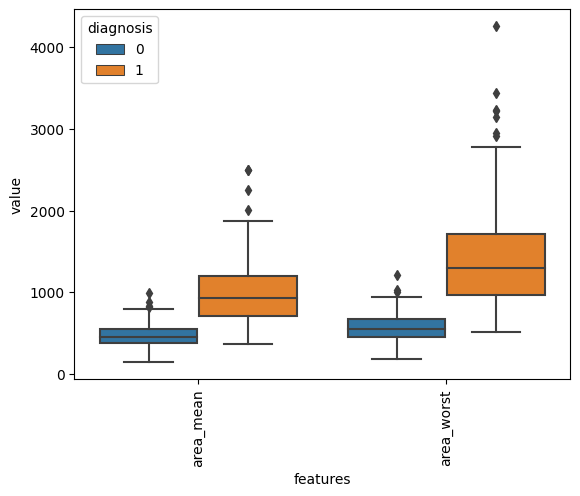

In [ ]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=datamelt7)
plt.xticks(rotation=90)

**Analysis**

A)
**Smoothness_se, texture_se, fractal_dimension_mean** - These characteristics present benign and malignant data very similar, with almost equal medians.

**Symmetry_se** - Only Feature with a median of benign greater than malignant.

**The remaining Features** - Showed a malignant median greater than benign, a correlation of larger values with malignant tumors, which tends to be good for classification models.

B)
**Fractal_dimension_se,concavity_se, perimeter_se, area_se** - Features with outliers more discrepant.

**Evaluation of Machine Learning Algorithms**

**Build Models**

In [59]:
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('SVC', SVC(random_state=0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(random_state=0)))
models.append(('XGB', XGBClassifier(random_state=0)))
models.append(('LGBM', LGBMClassifier(random_state=0,verbose=-1)))
# evaluate each model in turn
results1 = []
names = []
for name, model in models:
 kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 cv_results1 = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
 results1.append(cv_results1)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
 print(msg)

LR: 0.937137 (0.029531)
SVC: 0.901068 (0.037608)
KNN: 0.917821 (0.040328)
DTC: 0.920491 (0.035896)
XGB: 0.958120 (0.029209)
LGBM: 0.961410 (0.032367)


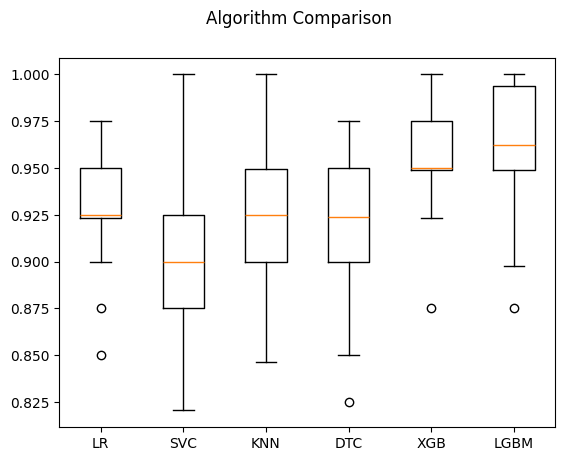

In [60]:
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names)
plt.show()

From these results, we can see that it looks like **LightGBM** has the **largest** estimated accuracy score at about 0.9614 or **96,14%**

**Build Models scaled**

In [61]:
pipelines = []
pipelines.append(('LR_scaled' , (Pipeline([('scaled' , StandardScaler()),('LR',LogisticRegression(random_state=0))]))))
pipelines.append(('SVC_scaled' , (Pipeline([('scaled' , StandardScaler()),('SVC',SVC(random_state=0))]))))
pipelines.append(('KNN_scaled' , (Pipeline([('scaled' , StandardScaler()),('KNN',KNeighborsClassifier())]))))
pipelines.append(('DT_scaled' , (Pipeline([('scaled' , StandardScaler()),('DT',DecisionTreeClassifier(random_state=0))]))))
pipelines.append(('XGB_scaled' , (Pipeline([('scaled' , StandardScaler()),('XGB', XGBClassifier(random_state=0))]))))
pipelines.append(('LGB_scaled' , (Pipeline([('scaled' , StandardScaler()),('LGB', LGBMClassifier(random_state=0,verbose=-1))]))))

model_name = []
results2 = []
for pipe ,model in pipelines:
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    crossv_results2 = cross_val_score(model , x_train ,y_train ,cv =kfold , scoring='accuracy')
    results2.append(crossv_results2)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model_name, crossv_results2.mean(), crossv_results2.std())
    print(msg)

['LR_scaled']: 0.983205 (0.020907)
['LR_scaled', 'SVC_scaled']: 0.976538 (0.020462)
['LR_scaled', 'SVC_scaled', 'KNN_scaled']: 0.963162 (0.030171)
['LR_scaled', 'SVC_scaled', 'KNN_scaled', 'DT_scaled']: 0.920491 (0.035896)
['LR_scaled', 'SVC_scaled', 'KNN_scaled', 'DT_scaled', 'XGB_scaled']: 0.958120 (0.029209)
['LR_scaled', 'SVC_scaled', 'KNN_scaled', 'DT_scaled', 'XGB_scaled', 'LGB_scaled']: 0.964786 (0.027996)


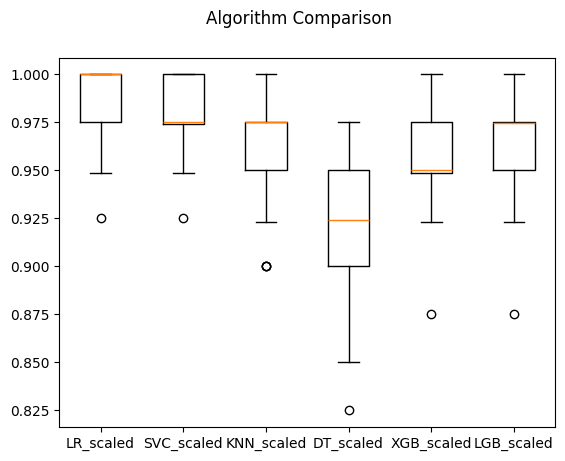

In [62]:
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(model_name)
plt.show()


From these results, we can see that after scaling the **Regression Logistic** model had increased estimated accuracy score from 93,62 to **98,32**, thus becoming the **best performance model**.

## Algorithm comparison (Mean)

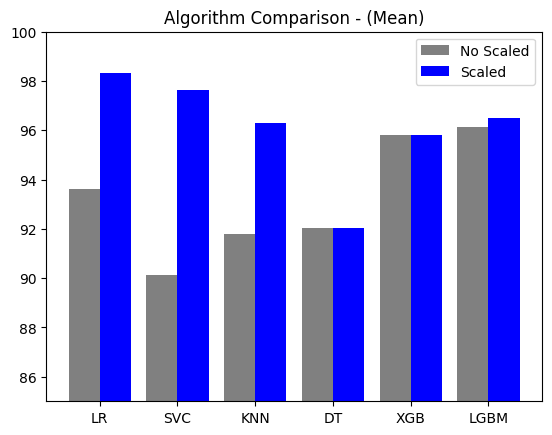

In [63]:
x = np.arange(6)
z1 = [93.62, 90.11, 91.78, 92.05, 95.81, 96.14]
z2 = [98.32, 97.65, 96.31, 92.05, 95.81, 96.48]
width = 0.40
plt.bar(x-0.2, z1, width,color='gray')
plt.bar(x+0.2, z2, width,color='blue')
plt.ylim(85, 100)
plt.xticks(x, ['LR', 'SVC', 'KNN','DT', 'XGB', 'LGBM'] )
plt.legend(["No Scaled", "Scaled"])
plt.title('Algorithm Comparison - (Mean)')
plt.show()



 As expected, Tree-Based Algorithms were fairly insensitive to the scale of the features, unlike the other algorithms.

 . **Gradient Descent Based Algorithms** like **LR**, require data to be scaled.
  The difference in the ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model.

 . **Distance-Based Algorithms** like **KNN, SVC**,  are most affected by the range of features. This is because, behind the scenes, they are using distances between data points to determine their similarity.
Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.

**Tree-Based Algorithms** like **DT, XGB,LGBM**, are fairly insensitive to the scale of the features. A decision tree only splits a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. Other features do not influence this split on a feature. So, the remaining features have virtually no effect on the split. This is what makes them invariant to the scale of the features!

**Selected models**

Logistic Regression and LightGBM were the selected models

## Logistic Regression - Scaled

**Hyperparameter tuning**

In [94]:
from skopt import BayesSearchCV
np.int = int

In [97]:
# build a pipeline with two steps, the scaler and the LogisticRegression
pipe=Pipeline([('scalar1',StandardScaler()),
              ('classifier',LogisticRegression(random_state=0))])
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = [
                {"classifier__penalty": ['l2','l1'],
                 "classifier__solver":['saga','liblinear'],
                 "classifier__C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                 "classifier__max_iter":[100, 1000,2500, 5000]},
                 {"classifier__penalty": ['l2'],
                 "classifier__solver":['newton-cg','newton-cholesky','sag','lbfgs'],
                 "classifier__C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                 "classifier__max_iter":[100, 1000,2500, 5000]
                 }]
# define search
Bayes = BayesSearchCV(pipe, space, n_jobs=-1, scoring='accuracy', cv=cv)
# execute search
result = Bayes.fit(x_train, y_train)

In [98]:
# summarize result
print("Best Score:%.4f" % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score:0.9832
Best Hyperparameters: OrderedDict({'classifier__C': 1.0, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'})


In [99]:
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.973120 (0.025148) with: OrderedDict({'classifier__C': 10.0, 'classifier__max_iter': 2500, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'})
0.954679 (0.031012) with: OrderedDict({'classifier__C': 0.0001, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'})
0.625641 (0.005875) with: OrderedDict({'classifier__C': 0.0001, 'classifier__max_iter': 2500, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'})
0.972350 (0.024527) with: OrderedDict({'classifier__C': 0.1, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'})
0.951410 (0.026624) with: OrderedDict({'classifier__C': 0.01, 'classifier__max_iter': 2500, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'})
0.787179 (0.044236) with: OrderedDict({'classifier__C': 0.01, 'classifier__max_iter': 5000, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'})
0.974872 (0.021461) with: OrderedDict({'classifier__C': 1.0, 'classifi

**Make Predictions**

In [100]:
# Make predictions on validation dataset
model = result.best_estimator_
predictions = model.predict(x_test)
y_pred = model.predict_proba(x_test)[:, 1]

# Evaluate predictions
print ("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions)* 100.0))
print("ROC AUC:: %.2f%%" % (roc_auc_score(y_test, y_pred) * 100.0))

Accuracy: 97.66%
ROC AUC:: 99.40%


## LightGBM

**Hyperparameter tuning**

In [101]:
from lightgbm import LGBMClassifier
from skopt import BayesSearchCV

In [102]:
# define model
lgbm = LGBMClassifier(random_state=0, subsample_freq=1,
                         n_estimators=100,verbose=-1)
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = {'learning_rate': (1e-3, 1e-1, "log-uniform"),
         'num_leaves':(2, 130),
         'min_child_samples': (1, 100),
         'subsample': (0.05, 1.0),
         'colsample_bytree':(0.1, 1.0)}
         # define search
BayesL = BayesSearchCV(lgbm, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
resultL = BayesL.fit(x_train, y_train)

In [103]:
# summarize result
print("Best Score:%.4f" % resultL.best_score_)
print('Best Hyperparameters: %s' % resultL.best_params_)

Best Score:0.9657
Best Hyperparameters: OrderedDict({'colsample_bytree': 0.44675950765672123, 'learning_rate': 0.1, 'min_child_samples': 63, 'num_leaves': 130, 'subsample': 0.8419205026919531})


In [104]:
means = resultL.cv_results_['mean_test_score']
stds = resultL.cv_results_['std_test_score']
params = resultL.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.625641 (0.005875) with: OrderedDict({'colsample_bytree': 0.7941685916455502, 'learning_rate': 0.0012871728472035268, 'min_child_samples': 57, 'num_leaves': 25, 'subsample': 0.6249473708592763})
0.939573 (0.034457) with: OrderedDict({'colsample_bytree': 0.23981425011687932, 'learning_rate': 0.016670626859187347, 'min_child_samples': 43, 'num_leaves': 50, 'subsample': 0.253708741454705})
0.625641 (0.005875) with: OrderedDict({'colsample_bytree': 0.7582368690305152, 'learning_rate': 0.01670161875955387, 'min_child_samples': 57, 'num_leaves': 86, 'subsample': 0.25256226843433616})
0.939658 (0.032858) with: OrderedDict({'colsample_bytree': 0.7094163533452391, 'learning_rate': 0.016846897602874295, 'min_child_samples': 35, 'num_leaves': 49, 'subsample': 0.6880882540403309})
0.924658 (0.041943) with: OrderedDict({'colsample_bytree': 0.5991599376217651, 'learning_rate': 0.005750926544957154, 'min_child_samples': 46, 'num_leaves': 104, 'subsample': 0.7870621977464134})
0.625641 (0.005875) wit

**Make Predictions**

In [105]:
# Make predictions on validation dataset
predict = BayesL.predict(x_test)
y_predict = BayesL.predict_proba(x_test)[:, 1]

# Evaluate predictions
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predict) * 100.0))
print("ROC AUC:: %.2f%%" % (roc_auc_score(y_test, y_predict) * 100.0))

Accuracy: 96.49%
ROC AUC:: 99.60%
